In [ ]:
import numpy as np 
import pandas as pd 
from sklearn import model_selection

from sklearn.metrics import f1_score, accuracy_score, precision_score, recall_score

In [ ]:
URL = "DATASET_URL"

In [ ]:
#READ FILE
tweets = pd.read_csv(URL)

In [ ]:
#Label encoding
tweets['encode_label']=tweets['Category'].apply(lambda x: 1 if x=='yes' else 0)
tweets.sample(5)

,author id,created_at,geo,id,lang,like_count,quote_count,reply_count,retweet_count,source,tweet,Disease,Category,location,bbox,normalized_tweet,preprocessed_tweet,encode_label
638,1.545577e+09,2022-05-27 19:57:38+00:00,1c00cf44f69d95d3,1.530000e+18,en,2,0,1,3,Twitter for Android,The WHO's guide to monkeypox...\n'wear a mask...,Monkeypox,yes,"Ilfracombe, England","[-4.1405462, 51.1872567, -4.096538, 51.211164]","['guide', 'monkeypox', 'wear', 'mask', 'handli...",guide monkeypox wear mask handling clothes bed...,1
811,3.254836e+08,2022-05-02 17:01:04+00:00,00fd3b1ffb89eb31,1.520000e+18,en,1,0,0,2,Twitter for Android,#PintofScience is a festival held worldwide sh...,NaN,no,"Salisbury, England","[-1.838006, 51.050942, -1.765956, 51.093695]","['festival', 'held', 'worldwide', 'sharing', '...",pintofscience festival held worldwide sharing ...,0
647,2.424065e+07,2022-05-26 22:13:02+00:00,7f15dd80ac78ef40,1.530000e+18,en,0,0,0,0,Twitter for iPhone,"IÃ¢â‚¬â„¢ve just remembered, I have Covid, an...",COVID,yes,"Bristol, England","[-2.659936, 51.399367, -2.510844, 51.516387]","['remembered', 'covid', 'another', 'bbq', 'acc...",remembered covid another bbq accident arm infe...,1
496,1.130000e+18,2022-02-06 13:15:58+00:00,616ba1df27270916,1.490000e+18,en,1,0,2,0,Twitter for iPhone,"CN, periods/body horror/sickness\n.\n.\n.\n.\n...",NaN,no,"Oxford, England","[-1.289608, 51.7122668, -1.1772587, 51.796305]","['body', 'horror', 'sickness', 'cycle', 'like'...",cn periods body horror sickness cycles like ma...,0
50,3.964340e+08,2021-02-27 22:14:34+00:00,4caac408027bf2e3,1.370000e+18,en,0,0,1,0,Twitter for iPhone,Sorry not buying that all 7 people were 75+...,Winter flu,yes,"Lincoln, England","[-0.5993999, 53.186267, -0.49538, 53.2551753]","['buying', 'people', 'normal', 'winter', 'flu'...",sorry buying people normal winter flu virus wo...,1


In [ ]:
import pandas as pd

df = pd.read_csv(URL)
df.head(5)

,author id,created_at,geo,id,lang,like_count,quote_count,reply_count,retweet_count,source,tweet,Disease,Category,location,bbox,normalized_tweet,preprocessed_tweet
0,8.847627e+07,2021-01-30 23:27:51+00:00,0af014accd6f6e99,1.360000e+18,en,2,0,0,0,Twitter for iPhone,"Also, spoongate and highlightergate took me p...",NaN,no,"Scotland, United Kingdom","[-7.66085699743185, 54.6336309570711, -0.74002...","['highlightergate', 'took', 'perilously', 'clo...",also spoongate highlightergate took perilously...
1,2.212480e+09,2021-01-30 23:22:42+00:00,544762ebf7fda780,1.360000e+18,en,0,0,1,0,Twitter for Android,But spreading the vaccine more thinly acro...,NaN,no,"Islington, London","[-0.1420579, 51.5185518, -0.076305, 51.575301]","['vaccine', 'thinly', 'across', 'country', 'op...",spreading vaccine thinly across countries oppo...
2,2.180468e+07,2021-01-30 23:21:37+00:00,0282e03e23c71cd9,1.360000e+18,en,0,0,0,0,Twitter for iPhone,You read my mind!,NaN,no,"Walberton, England","[-0.649321, 50.842058, -0.613803, 50.857136]",['mind'],read mind
3,3.368075e+09,2021-01-30 23:17:59+00:00,6950c01e141ecebc,1.360000e+18,en,2,0,0,0,Twitter for iPhone,The fact sea shanties are viral on tiktok has ...,NaN,no,"Pendeen, England","[-5.672772, 50.147916, -5.650931, 50.155494]","['sea', 'shanty', 'viral', 'tiktok', 'made', '...",fact sea shanties viral tiktok made heart happ...
4,1.170000e+18,2021-01-30 23:11:52+00:00,3e20eaf0dc70acfe,1.360000e+18,en,0,0,0,0,Twitter for Android,good evening guys Ã¢ÂÂ¤Ã¯Â¸Â I miss you....,NaN,no,"Stockton-on-Tees, England","[-1.372296, 54.538762, -1.2717038, 54.600693]","['guy', 'miss', 'virus', 'never', 'get', 'u', ...",good evening guys miss virus never get us back...


In [ ]:
#split training data
X_train, X_test, y_train, y_test = model_selection.train_test_split(tweets["normalized_tweet"], tweets["encode_label"], stratify=None, test_size=0.2)

In [ ]:
X_train.head()

713    ['say', 'suffering', 'nasty', 'bout', 'shingle...
866    ['basic', 'viral', 'tweet', 'link', 'space', '...
818    ['getting', 'message', 'saying', 'gone', 'vira...
34     ['invited', 'book', 'covid', 'test', 'went', '...
203    ['enough', 'fun', 'hell', 'norovirus', 'return...
Name: normalized_tweet, dtype: object

In [ ]:
#tfidf vectorizer
from sklearn.feature_extraction.text import TfidfVectorizer  

tfidfconverter = TfidfVectorizer(max_features=2000, min_df=5, max_df=0.7)  
tfidfconverter.fit(tweets["normalized_tweet"])
X_train = tfidfconverter.transform(X_train)
X_test = tfidfconverter.transform(X_test)

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
 


In [ ]:
 import matplotlib.pyplot as plt

In [ ]:
from sklearn.metrics import plot_confusion_matrix

In [ ]:
### SVM

In [ ]:
#SVM (RBF)
from sklearn.svm import SVC

svm_classifier = SVC(kernel="rbf")
svm_classifier.fit(X_train, y_train)

svm_predictions = svm_classifier.predict(X_test)

In [ ]:
# print Accuracy and confusion matrix of SVM(RBF)
print(confusion_matrix(y_test,svm_predictions))  
print(classification_report(y_test,svm_predictions))  
print("SVM Accuracy -->",accuracy_score(y_test, svm_predictions)*100)

[[74 19]
 [13 94]]
              precision    recall  f1-score   support

           0       0.85      0.80      0.82        93
           1       0.83      0.88      0.85       107

    accuracy                           0.84       200
   macro avg       0.84      0.84      0.84       200
weighted avg       0.84      0.84      0.84       200

SVM Accuracy --> 84.0


In [ ]:
#print Accuracy, precision, recall, f1-score

print("SVM f1-score -->",f1_score(y_test, svm_predictions)*100)
print("SVM precision_score -->",precision_score(y_test, svm_predictions)*100)
print("SVM recall_score -->",recall_score(y_test, svm_predictions)*100)

SVM f1-score --> 85.45454545454547
SVM precision_score --> 83.1858407079646
SVM recall_score --> 87.85046728971963


In [ ]:
 import matplotlib.pyplot as plt

In [ ]:
from sklearn.metrics import plot_confusion_matrix

In [ ]:
#print confusion matrix
print(confusion_matrix(y_test,svm_predictions))  
print(classification_report(y_test,svm_predictions))  

print("SVM Accuracy -->",accuracy_score(y_test, svm_predictions)*100)

[[74 19]
 [13 94]]
              precision    recall  f1-score   support

           0       0.85      0.80      0.82        93
           1       0.83      0.88      0.85       107

    accuracy                           0.84       200
   macro avg       0.84      0.84      0.84       200
weighted avg       0.84      0.84      0.84       200

SVM Accuracy --> 84.0


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


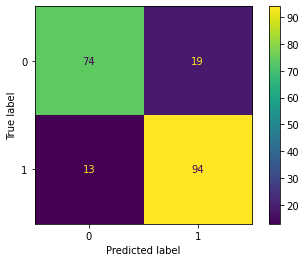

In [ ]:
#visualize confution matrix
clf4 = SVC(random_state=0)
clf4.fit(X_train, y_train)
SVC(random_state=0)
plot_confusion_matrix(clf4, X_test, y_test)  
plt.show()